In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten 

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train/255
x_test = x_test/255

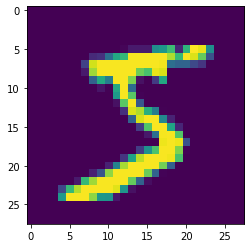

In [17]:
plt.imshow(x_train[0])

In [45]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
import time
start = time.time()
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)
print(time.time()-start)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0379 - accuracy: 0.6735 - val_loss: 0.5697 - val_accuracy: 0.8414
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4967 - accuracy: 0.8558 - val_loss: 0.4003 - val_accuracy: 0.8869
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3888 - accuracy: 0.8873 - val_loss: 0.3417 - val_accuracy: 0.9024
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.9024 - val_loss: 0.3034 - val_accuracy: 0.9115
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3095 - accuracy: 0.9107 - val_loss: 0.2799 - val_accuracy: 0.9202
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2873 - accuracy: 0.9173 - val_loss: 0.2568 - val_accuracy: 0.9252
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.9227 - val_loss: 0.2429 - val_accuracy:

In [49]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [50]:
y_pred = y_prob.argmax(axis=1)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9642

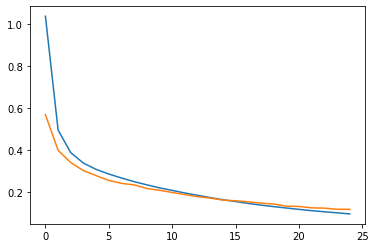

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

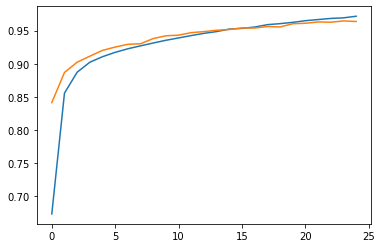

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])